In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib
from msresist.figures.figure3C_J import preprocess_maynard, annotate_maynard, plot_tsne
from msresist.figures.figure6I_H import *

In [2]:
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=60, facecolor='white', color_map = 'viridis_r')
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
adata = preprocess_maynard()
adata, TvsNAT, cc = annotate_maynard(adata)

/home/creixell/AXLomics/msresist/figures/figure3C_J.py:75: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['perc_mito'] = perc_mito_ot.transpose()
/home/creixell/AXLomics/msresist/figures/figure3C_J.py:84: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()
/home/creixell/miniconda3/envs/pf2_env/lib/python3.13/site-packages/scanpy/tools/_score_genes.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/home/creixell/miniconda3/envs/pf2_env/lib/python3.13/site-packages/scanpy/tools/_score_genes.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [4]:
adata_egfr = adata[adata.obs["Driver gene"] == "EGFR"]
cc_egfr = cc[(cc.obs["Driver gene"] == "EGFR")]
TvsNAT_egfr = TvsNAT[TvsNAT.obs["Driver gene"] == "EGFR"]

In [5]:
from msresist.pre_processing import preprocessing
from msresist.clustering import DDMC
from msresist.figures.common import Introduce_Correct_DDMC_labels

# Import AXL pY MS Signaling Data
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)

X = Introduce_Correct_DDMC_labels(X, ddmc)
C2_3 = X[(X["Cluster"] == 2) | (X["Cluster"] == 3)][["Cluster", "Gene", "Position", "PC9 A", "KO A"]]
C2_3

/home/creixell/AXLomics/msresist/pre_processing.py:121: FutureWarning: The provided callable <function mean at 0x7fef3c703880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(X, values=values, index=indices, aggfunc=np.mean)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function mean at 0x7fef3c703880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  X = pd.pivot_table(triplicates, values=triplicates[data_headers].columns, index=merging_indices, aggfunc=func_tri)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function std at 0x7fef3c7039c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided 

,Cluster,Gene,Position,PC9 A,KO A
2,2,TNKS1BP1,Y940-p,0.415388,-0.195927
3,2,PSMC1,Y25-p,-0.108045,-0.476332
4,3,RPS10,Y12-p,0.498325,-0.237557
5,3,RPS10,Y82-p,0.756587,0.126418
7,2,RPS3,Y120-p,0.174842,0.231856
...,...,...,...,...,...
559,2,KIAA1671,Y733-p,0.179742,-0.054978
560,3,UMPS,Y37-p,-0.175413,-0.237500
562,2,VASP,Y39-p,0.137237,-0.199530
564,3,VCL,Y692-p,-0.065108,-0.274164


/home/creixell/miniconda3/envs/pf2_env/lib/python3.13/site-packages/scanpy/tools/_score_genes.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


Cordenonsi YAP: PD vs RD p=1.435e-49, PD vs TKI naive (TN) p=1.455e-55
WP4534 YAP: PD vs RD p=5.557e-137, PD vs TKI naive (TN) p=5.523e-51
YAP1 UP: PD vs RD p=9.337e-17, PD vs TKI naive (TN) p=5.136e-41


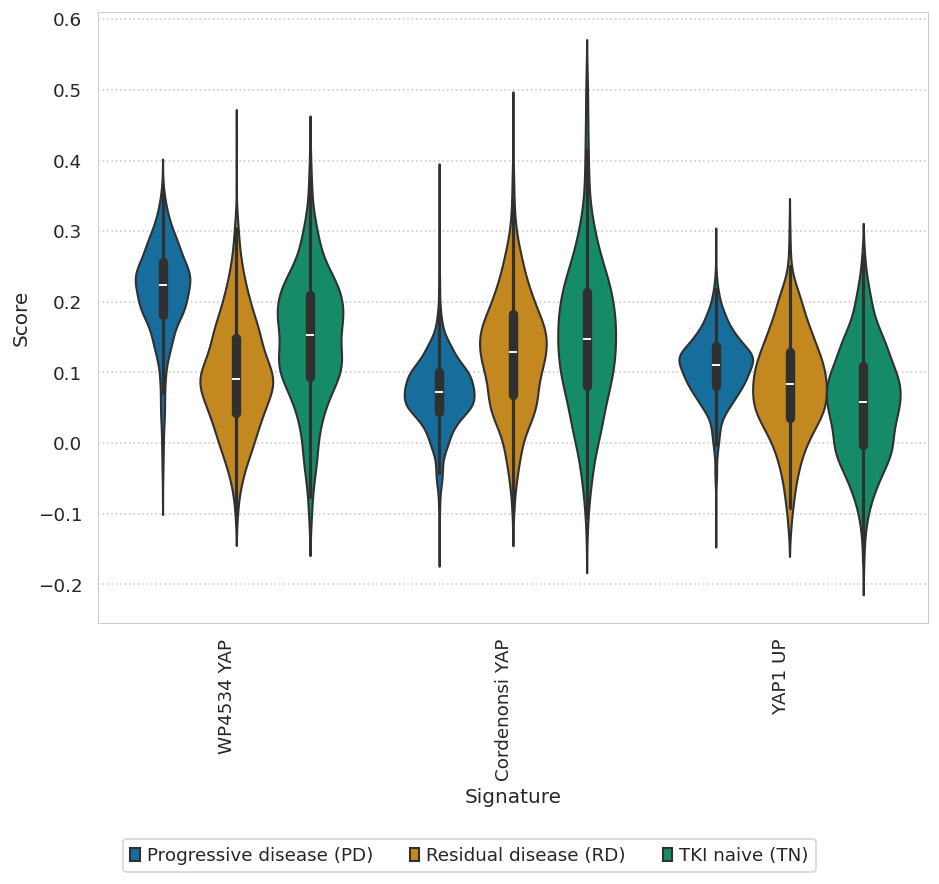

In [6]:
violin_plot_YAPsignatures(cc_egfr, C2_3, savefig=False, print_mann_whitney_test=True)

/home/creixell/AXLomics/msresist/figures/figure6I_H.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pseudobulk = df.groupby(id_col, as_index=False).mean()
/home/creixell/AXLomics/msresist/figures/figure6I_H.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pseudobulk = df.groupby(id_col, as_index=False).mean()
/home/creixell/AXLomics/msresist/figures/figure6I_H.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

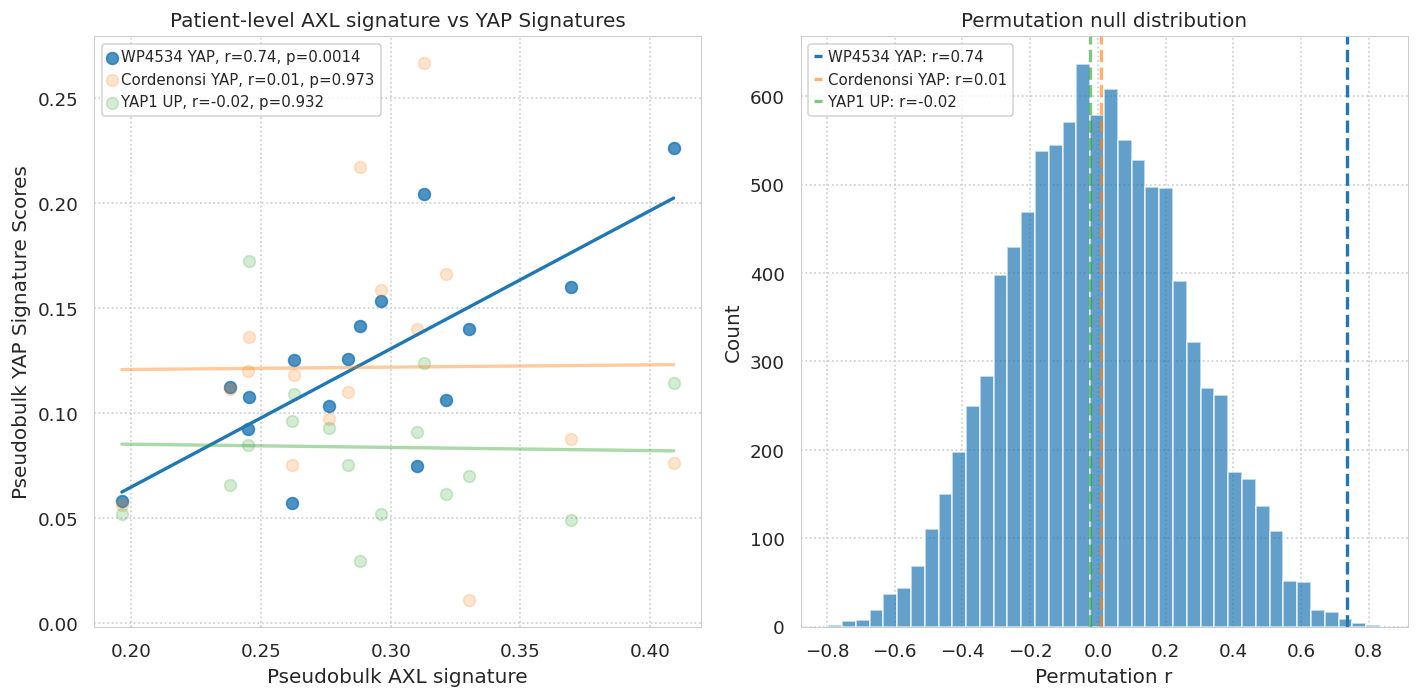

In [7]:
plot_perm_result(cc_egfr, "AXL signature", "WP4534 YAP", n_permutations=10000, random_state=7, 
                     additional_y_names=["Cordenonsi YAP", "YAP1 UP"])

<Figure size 1600x1600 with 0 Axes>

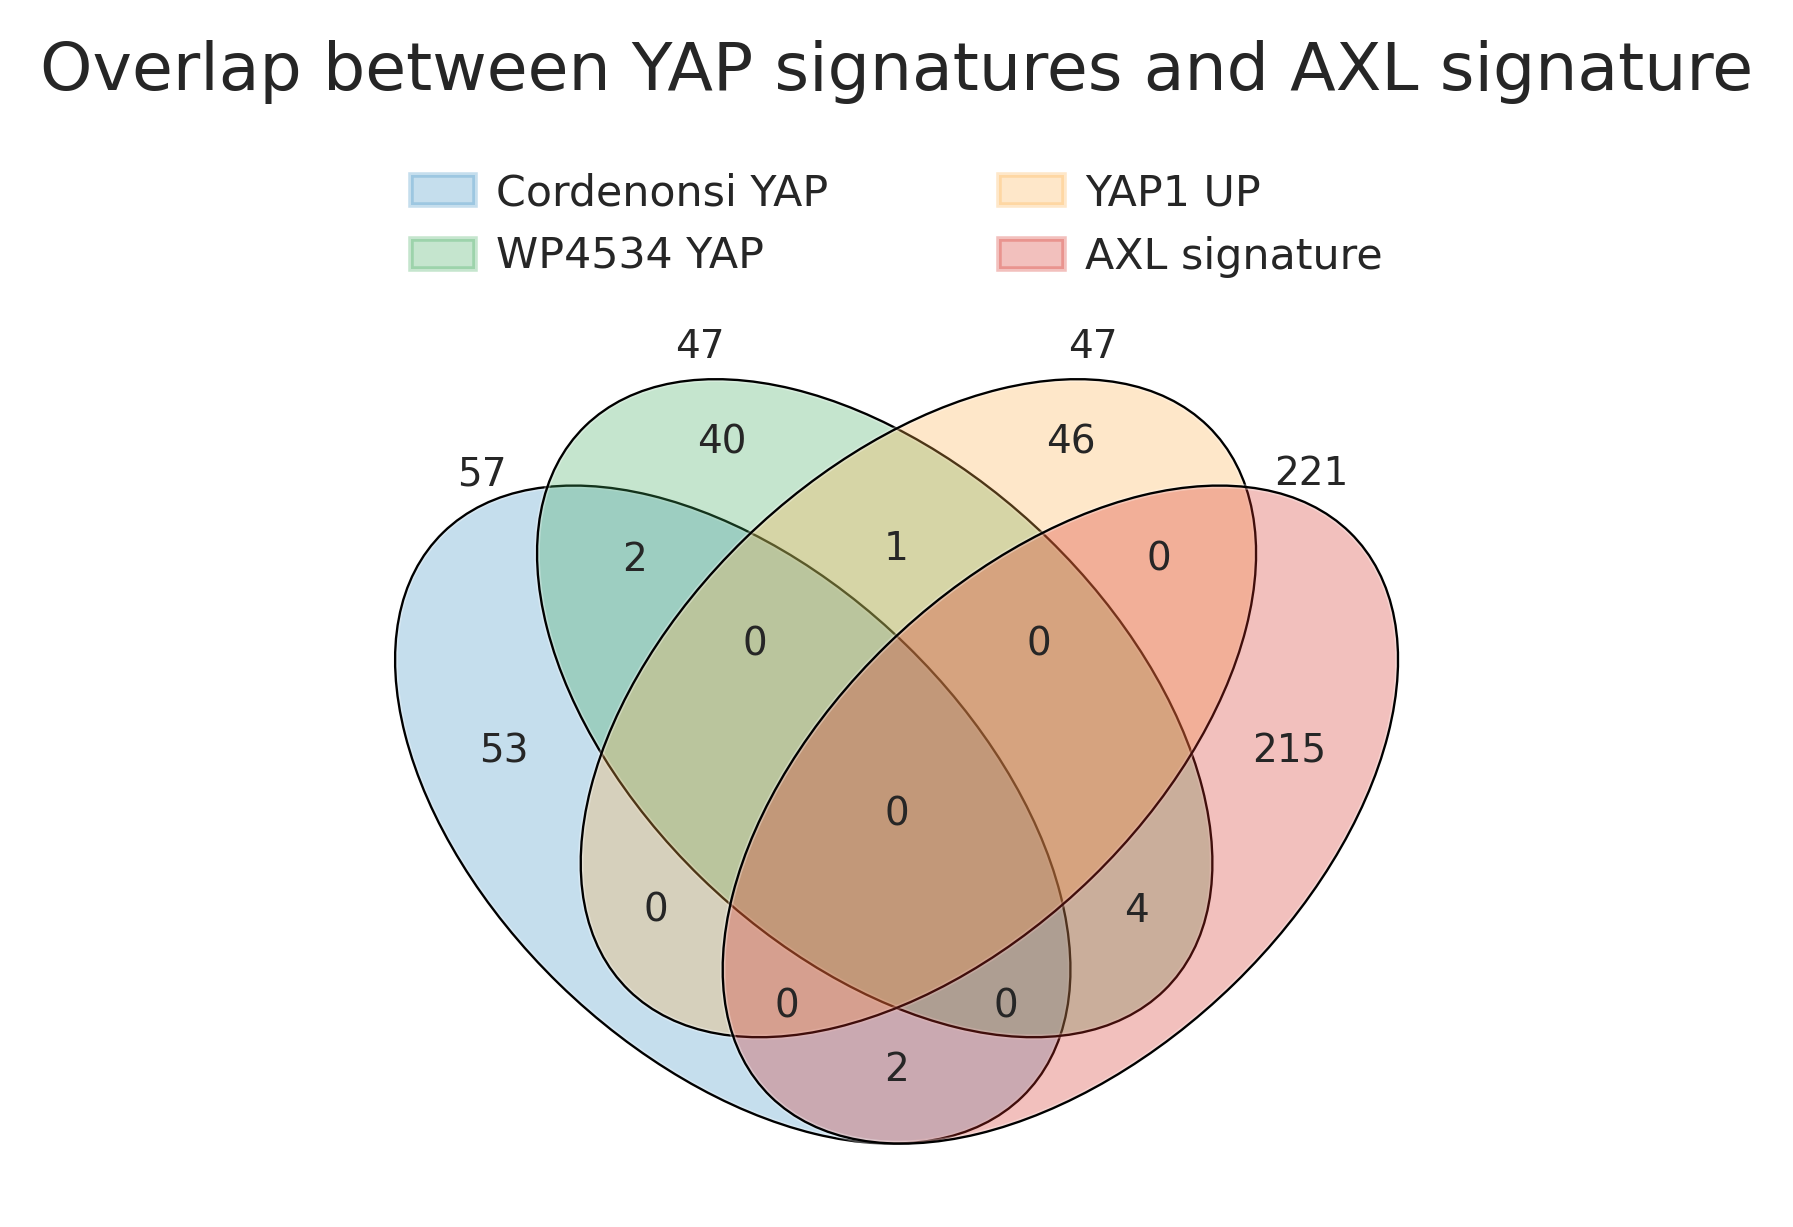

In [9]:
plot_venn_diagram_YAP_AXL_signatures(C2_3, 
                                     savefig="/home/creixell/AXLomics/msresist/out/plots/Venn_diagram_YAP_signatures_and_AXL_signature.svg", 
                                     return_venn_dict=False)

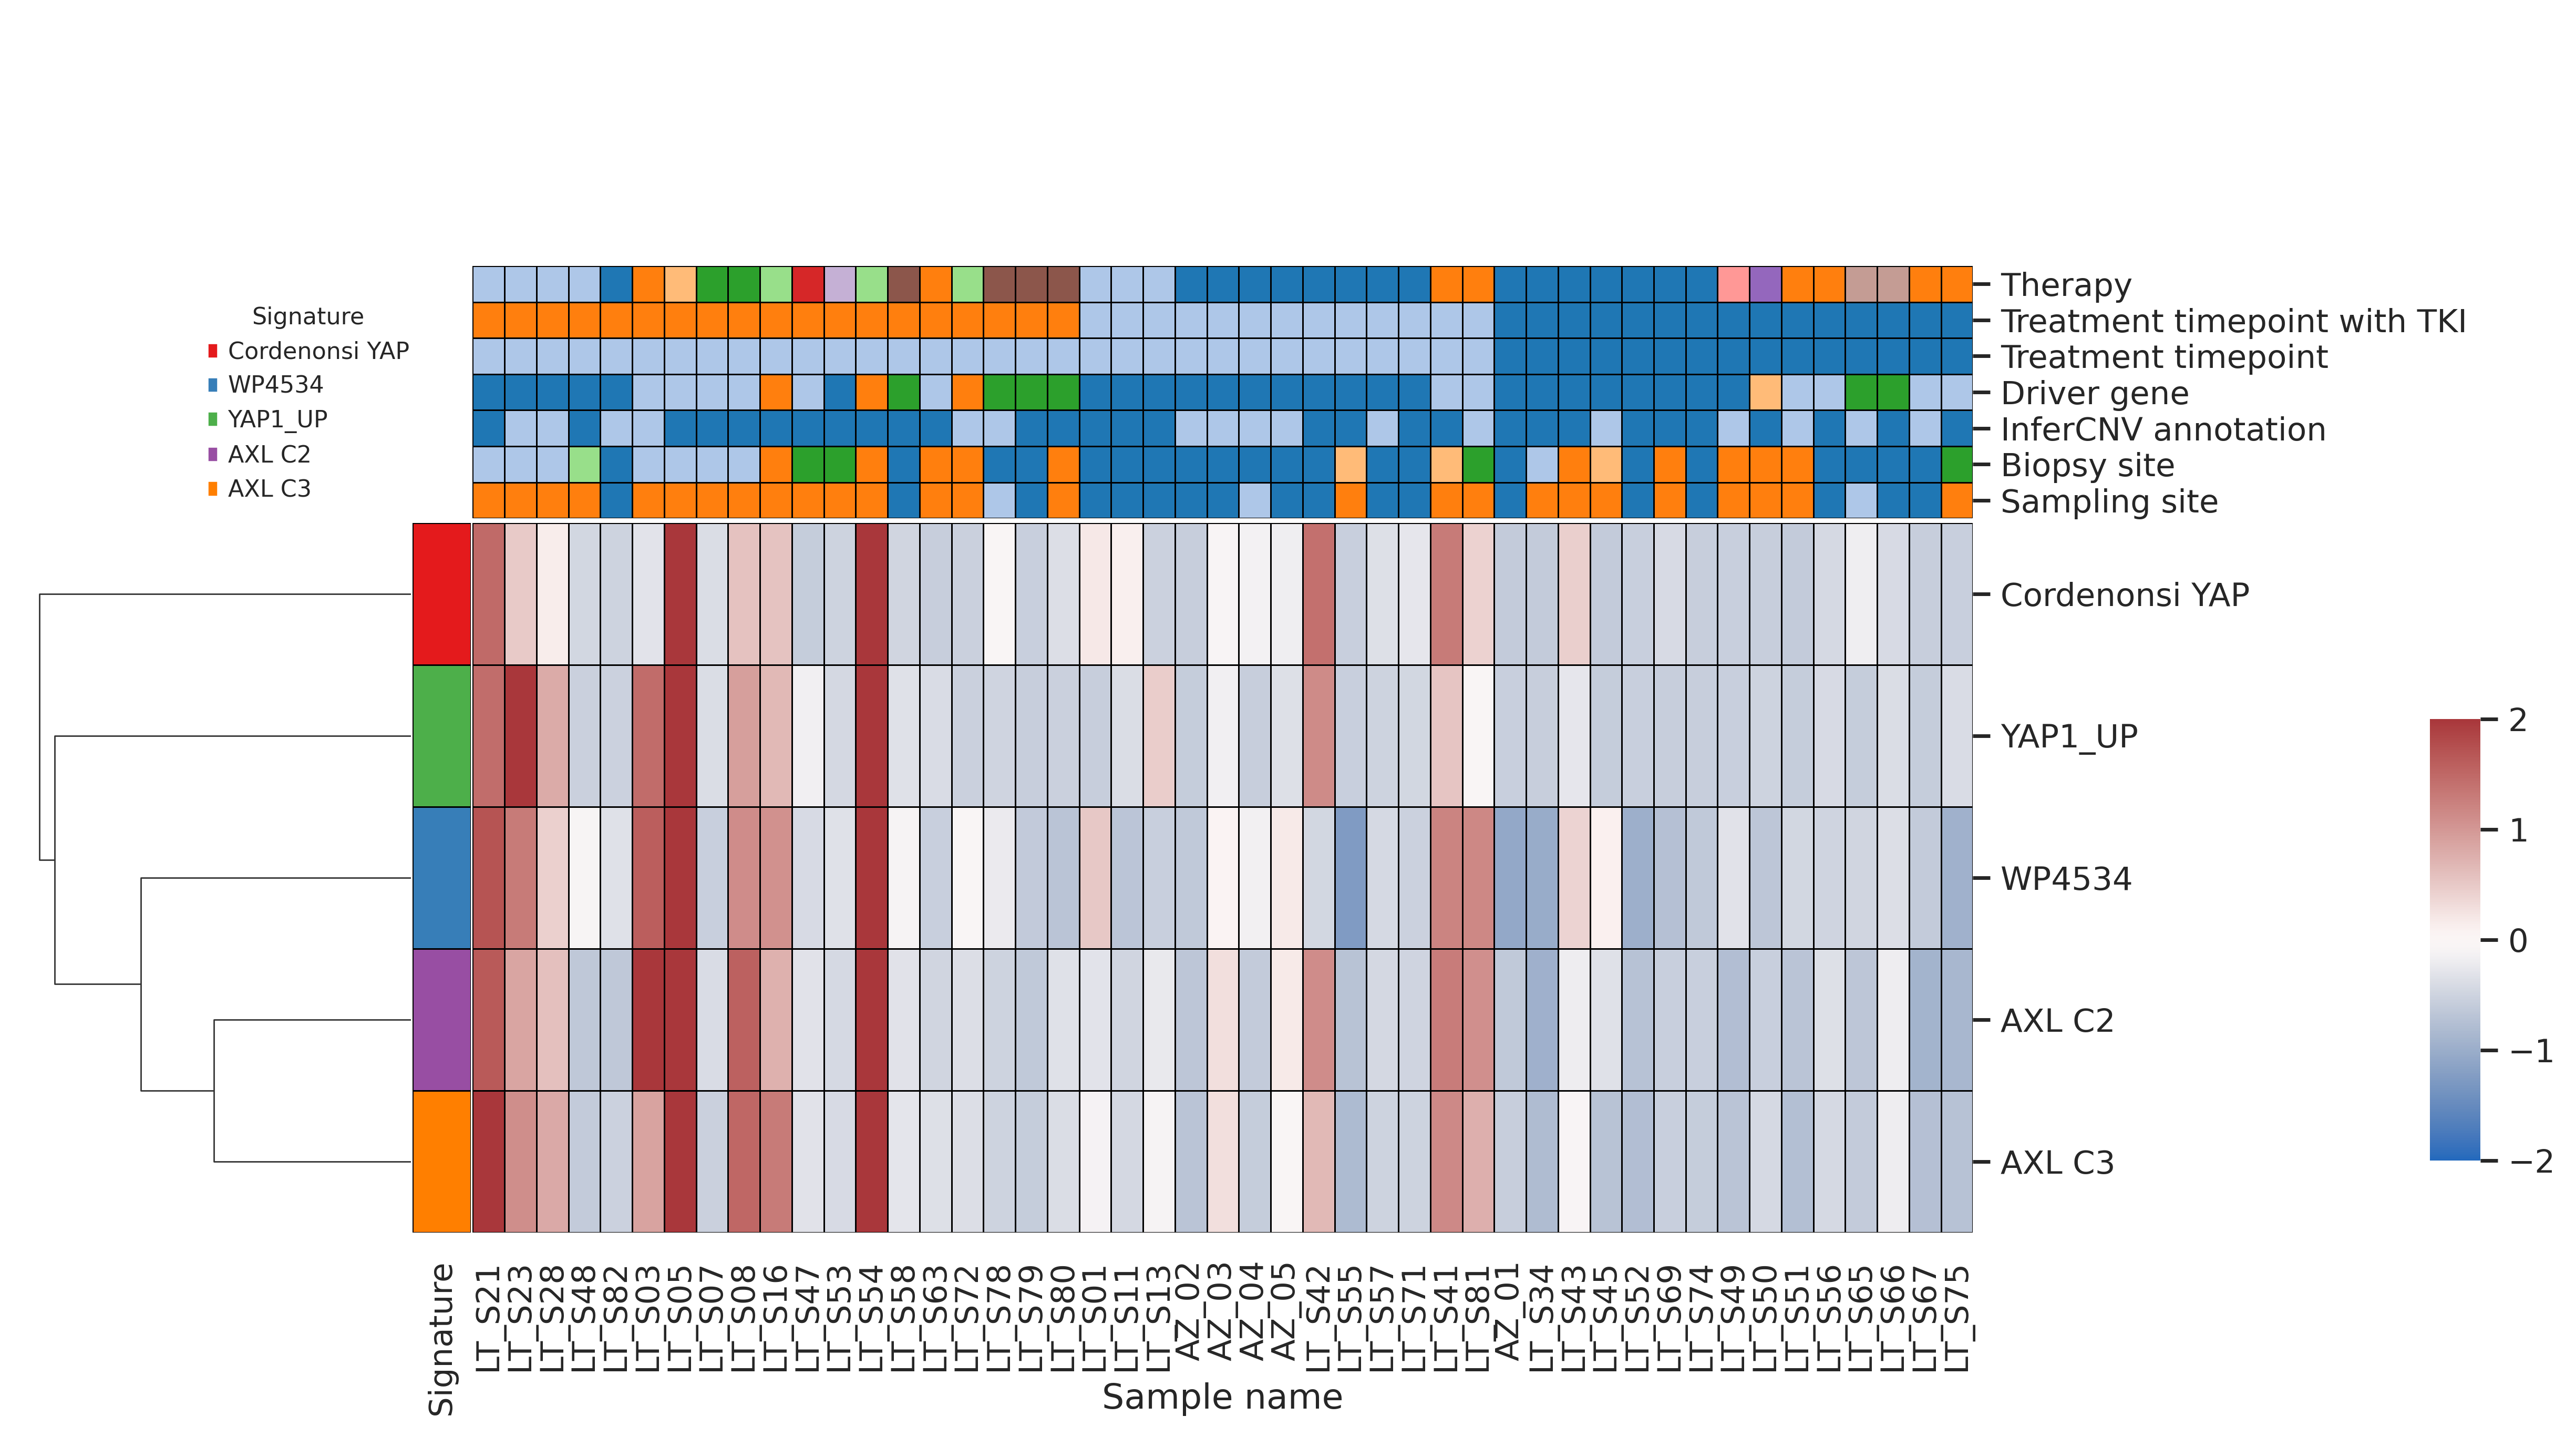

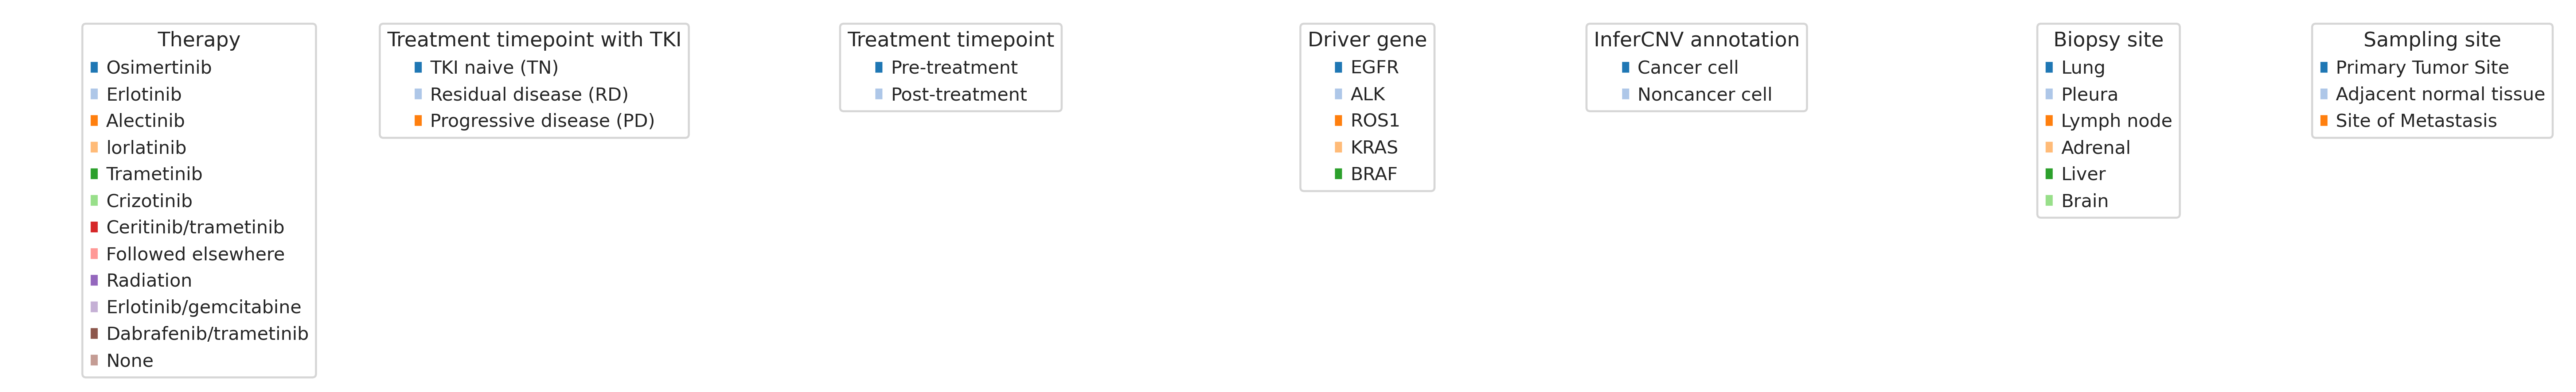

In [10]:
plot_pseudobulk_heatmap(TvsNAT, C2_3)